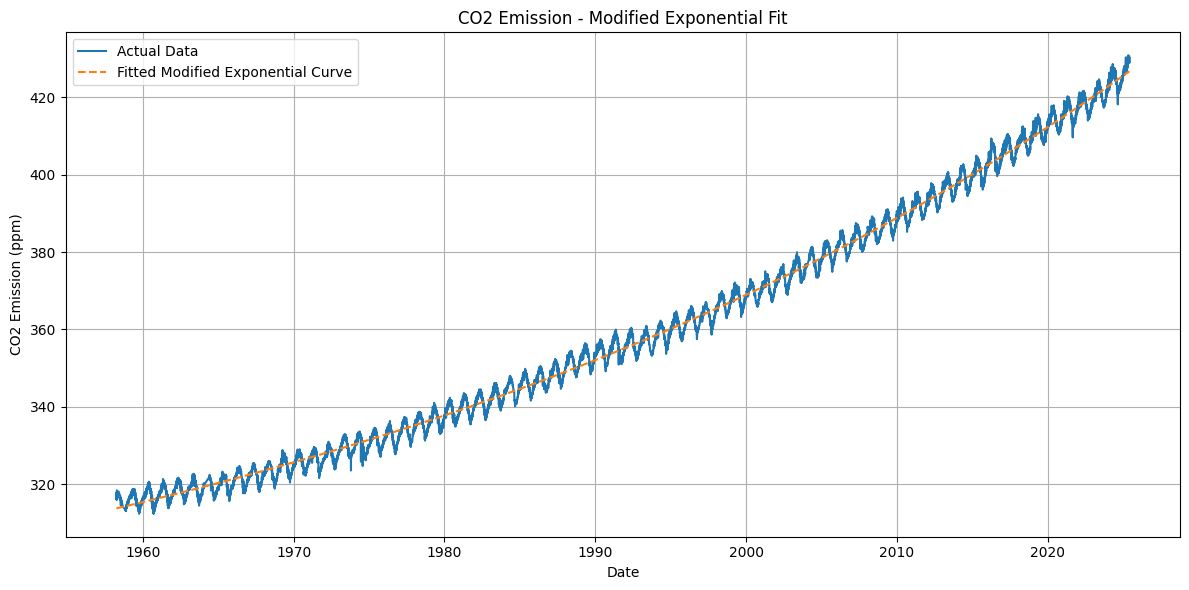

R² Score: 0.9953366210868312
Optimized Parameters: A = 55.587, B = 0.000045, C = 258.138
Covariance Matrix:
 [[ 1.22177279e-01 -6.00667909e-08 -1.35094374e-01]
 [-6.00667909e-08  2.97240016e-14  6.61141237e-08]
 [-1.35094374e-01  6.61141237e-08  1.50134521e-01]]


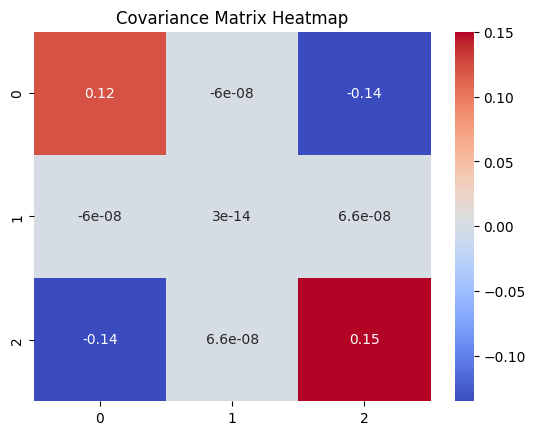

In [1]:
# PRACTICAL 01: Modified Exponential Curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Step 1: Load the dataset
path = "/content/co2-ppm-daily.csv"  # Update with your actual path
df = pd.read_csv(path)

# Step 2: Preprocess and transform
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)
df['Time'] = (df['date'] - df['date'].min()).dt.days
x = df['Time']
y = df['value']

# Step 3: Define the modified exponential model
def mod_exp(t, A, B, C):
    return A * np.exp(B * t) + C

# Step 4: Estimate initial values
A_init = y.iloc[0]
B_init = 1 / df['date'].iloc[len(df)//2].year
C_init = y.iloc[0]
p0 = [A_init, B_init, C_init]

# Step 5: Fit the model
params, cov = curve_fit(mod_exp, x, y, p0=p0, maxfev=10000)

# Step 6: Generate predictions
y_pred = mod_exp(x, *params)

# Step 7: Visualize
plt.figure(figsize=(12, 6))
plt.plot(df['date'], y, label="Actual Data")
plt.plot(df['date'], y_pred, '--', label="Fitted Modified Exponential Curve")
plt.title("CO2 Emission - Modified Exponential Fit")
plt.xlabel("Date")
plt.ylabel("CO2 Emission (ppm)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Step 8: Evaluate model
r2 = r2_score(y, y_pred)
print("R² Score:", r2)
print("Optimized Parameters: A = {:.3f}, B = {:.6f}, C = {:.3f}".format(*params))
print("Covariance Matrix:\n", cov)

# Heatmap of parameter covariance
sns.heatmap(cov, annot=True, cmap='coolwarm')
plt.title("Covariance Matrix Heatmap")
plt.show()
